In [9]:
%load_ext autoreload
%autoreload 2

from notebooks.notebook_utils import *
import boolformer
from boolformer import load_boolformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Noiseless model
Use this model to predict logical circuits when you have access to the whole truth table. Can only handle input dimension up to 10

In [10]:
boolformer_noiseless = load_boolformer(mode='noiseless')

Loaded noiseless model


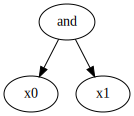

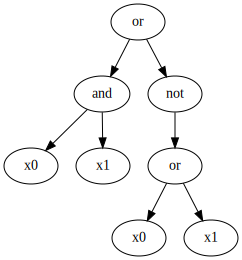

In [11]:
inputs = np.array([  
    [False, False],
    [False, True ],
    [True , False],
    [True , True ],
])
outputs1 = np.array([False, False, False, True])
outputs2 = np.array([True, False, False, True])
inputs = [inputs, inputs]
outputs = [outputs1, outputs2]
pred_trees, error_arr, complexity_arr = boolformer_noiseless.fit(inputs, outputs, verbose=False, beam_size=10, beam_type="search")

for pred_tree in pred_trees:
    display(pred_tree.graphviz())    
    # if this doesn't display correctly, try:
    #pred_tree.treelib().show()
    #display(boolformer_noiseless.env.simplifier.get_simple_infix(pred_tree, simplify_form='basic'))


Error, complexity: [0.0, 0.0, 0.0, 0.0], [1, 1, 5, 2]
Predicted trees: 


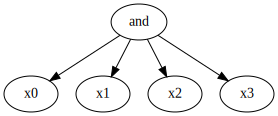

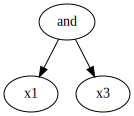

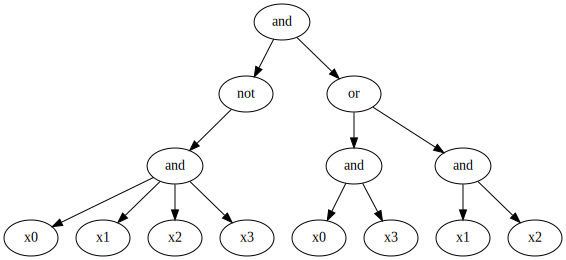

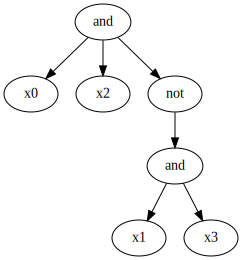

In [13]:
tree, n_vars = get_logical_circuit(function_name='multiplier_2')
inputs, outputs, val_inputs, val_outputs = generate_data(tree, n_vars=n_vars, n_points=None)
pred_trees, error_arr, complexity_arr = boolformer_noiseless.fit(inputs, outputs, verbose=False, beam_size=50, beam_type="search")

print(f"Error, complexity: {error_arr}, {complexity_arr}")
print("Predicted trees: ")
for pred_tree in pred_trees:
    display(pred_tree.graphviz())

# Noisy model
Use this model to predict a boolean function which approximates a set of (possibly noisy observation) with up to 80 input variables (but only up to 6 active variables)

In [14]:
boolformer_noisy = load_boolformer('noisy')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1IFSc_sHfiTckMy-cwggvVMBH1YgXas8G
From (redirected): https://drive.google.com/uc?id=1IFSc_sHfiTckMy-cwggvVMBH1YgXas8G&confirm=t&uuid=47e86b5a-b669-483a-babd-4c2af6bb1237
To: /data/rcp/boolean/boolformer_noisy.pt
100%|██████████| 543M/543M [00:14<00:00, 38.5MB/s] 


Loaded noisy model


## PMLB

F1 scores : 
RandomForestClassifier_1       : 0.988109881098811
RandomForestClassifier_100     : 0.9938280071320806
LogisticRegression             : 0.9615651449979187
Boolformer                     : 0.9569620253164557


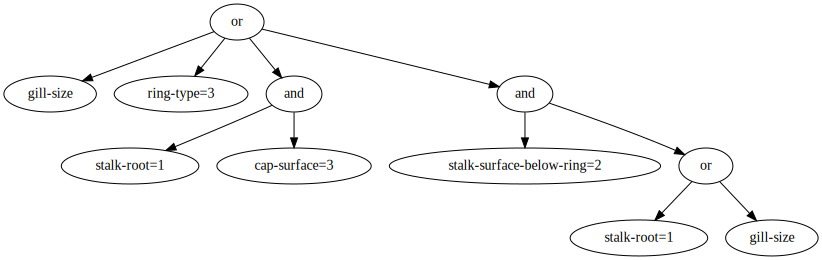

In [23]:
dataset_name = 'mushroom' # choose one of the PMLB datasets

(inputs, outputs, val_inputs, val_outputs, dictionary) = get_data_pmlb(dataset_name)
acc, f1, tree = run_models(boolformer_noisy, inputs, outputs, val_inputs, val_outputs, beam_size=20)

print("F1 scores : ")
for method_name, f1_score in f1.items():
    print(f"{method_name:30s} : {f1_score}")
tree.relabel_variables(dictionary)
display(tree.graphviz())